In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import preprocessing as ps
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import StratifiedKFold,cross_val_score,GridSearchCV
from sklearn.utils.class_weight import compute_class_weight
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from imblearn.ensemble import BalancedRandomForestClassifier
from imblearn.over_sampling import SMOTE,RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix





In [ ]:
Stroke=pd.read_csv("/content/drive/MyDrive/healthcare-dataset-stroke-data.csv")

EDA Started
Indiviual Features:



In [ ]:
Stroke.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
Stroke.info()
Stroke.shape
Stroke.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


<Axes: >

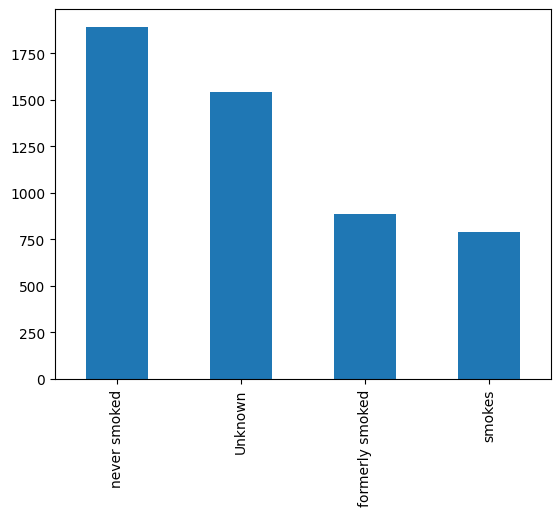

In [ ]:

Stroke['smoking_status'].value_counts().plot.bar()



<Axes: >

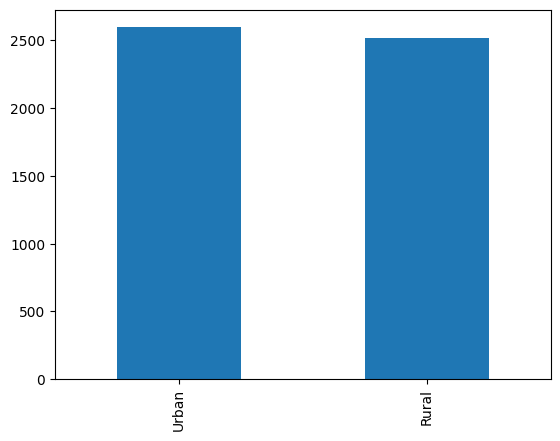

In [ ]:
Stroke['Residence_type'].value_counts().plot.bar()

<Axes: >

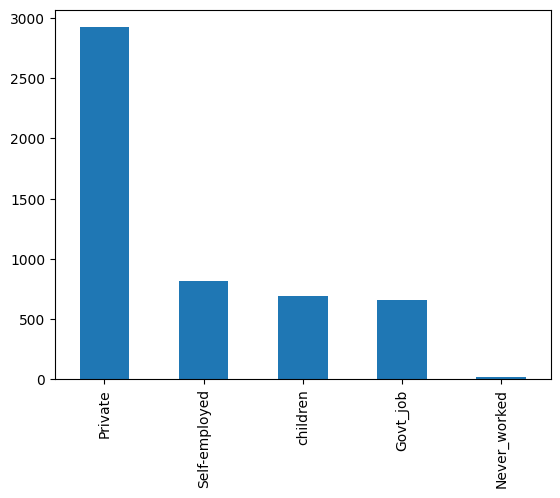

In [ ]:
Stroke['work_type'].value_counts().plot.bar()

<Axes: >

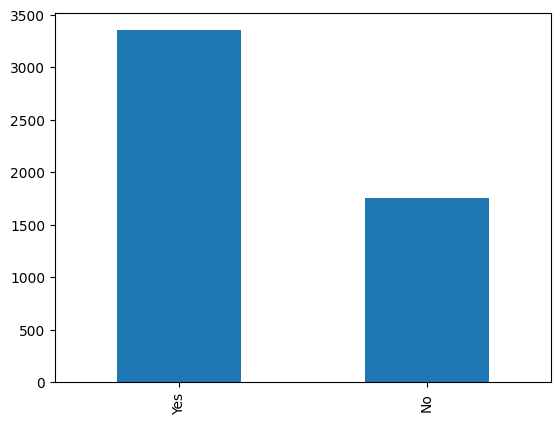

In [ ]:
Stroke['ever_married'].value_counts().plot.bar()

<Axes: >

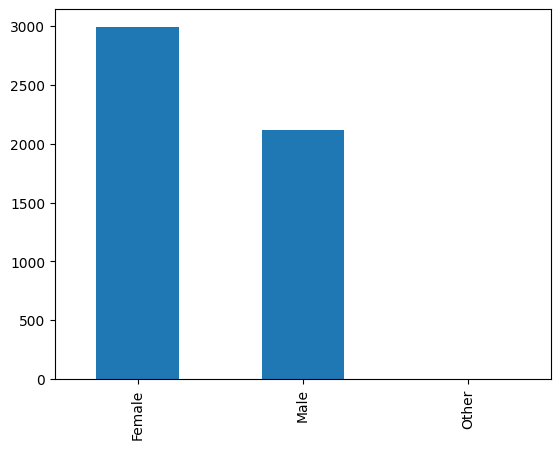

In [ ]:
Stroke['gender'].value_counts().plot.bar()



<Axes: >

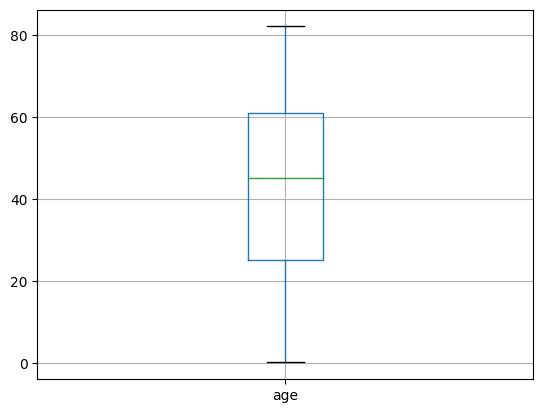

In [ ]:
plt.figure()
Stroke.boxplot(['age'])


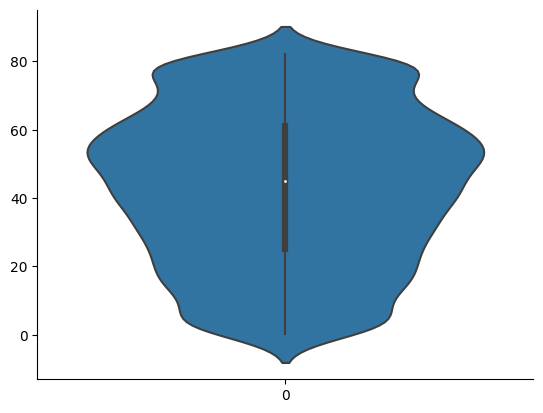

In [ ]:
sns.violinplot(Stroke['age'])
sns.despine()

<Axes: >

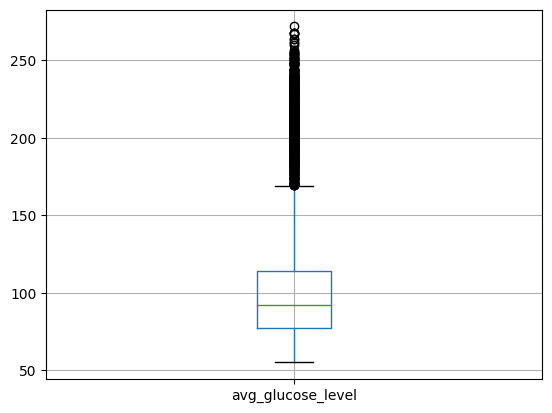

In [ ]:
plt.figure()
Stroke.boxplot(['avg_glucose_level'])

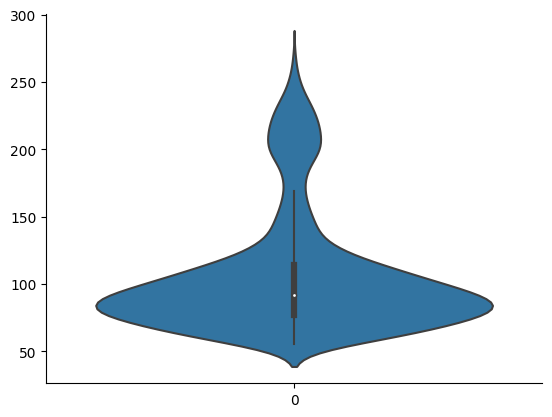

In [ ]:
sns.violinplot(Stroke['avg_glucose_level'])
sns.despine()

<Axes: >

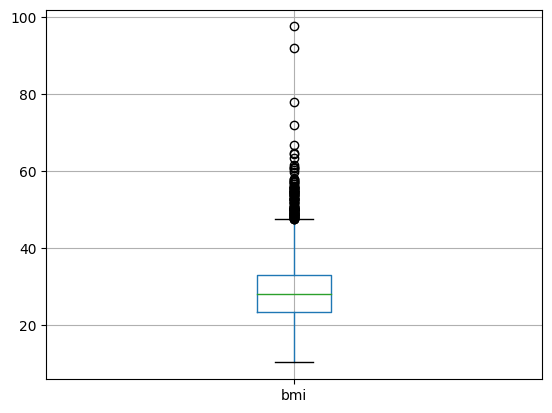

In [ ]:
plt.figure()
Stroke.boxplot(['bmi'])

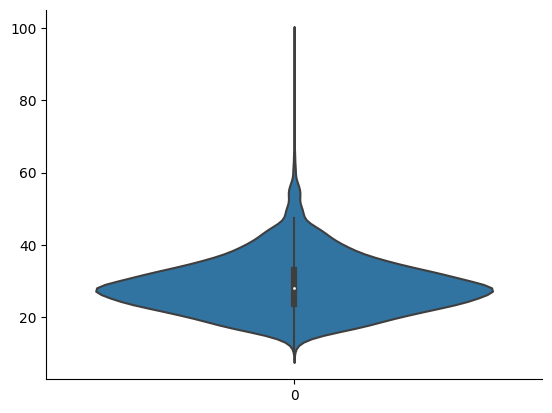

In [ ]:
sns.violinplot(Stroke['bmi'])
sns.despine()

Looking for the na Values and droppping it

In [ ]:
Stroke.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [ ]:
Stroke=Stroke.dropna()

Stroke=Stroke[Stroke['smoking_status'] !="Unknown"]
Stroke=Stroke[Stroke.gender !="Other"]



In [ ]:
Stroke.info()
Stroke.shape
Stroke.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3425 entries, 0 to 5108
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 3425 non-null   int64  
 1   gender             3425 non-null   object 
 2   age                3425 non-null   float64
 3   hypertension       3425 non-null   int64  
 4   heart_disease      3425 non-null   int64  
 5   ever_married       3425 non-null   object 
 6   work_type          3425 non-null   object 
 7   Residence_type     3425 non-null   object 
 8   avg_glucose_level  3425 non-null   float64
 9   bmi                3425 non-null   float64
 10  smoking_status     3425 non-null   object 
 11  stroke             3425 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 347.9+ KB


,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,3425.000000,3425.000000,3425.000000,3425.000000,3425.000000,3425.000000,3425.000000
mean,37333.512117,48.652555,0.119124,0.060146,108.311670,30.292350,0.052555
std,21050.593185,18.850018,0.323982,0.237792,47.706754,7.295778,0.223175
min,84.000000,10.000000,0.000000,0.000000,55.120000,11.500000,0.000000
25%,18986.000000,34.000000,0.000000,0.000000,77.230000,25.300000,0.000000
50%,38067.000000,50.000000,0.000000,0.000000,92.350000,29.100000,0.000000
75%,55459.000000,63.000000,0.000000,0.000000,116.200000,34.100000,0.000000
max,72915.000000,82.000000,1.000000,1.000000,271.740000,92.000000,1.000000


Dropping Ouliers:  



In [ ]:
Q1=Stroke['avg_glucose_level'].quantile(0.25)
Q3=Stroke['avg_glucose_level'].quantile(0.75)
IQR=Q3 - Q1

lower_bound=Q1 -1.5 * IQR
upper_bound=Q3 +1.5 * IQR

outliers=Stroke.index[(Stroke['avg_glucose_level']<lower_bound)|(Stroke['avg_glucose_level']>upper_bound)]
Stroke=Stroke.drop(outliers)



In [ ]:
Q1=Stroke['bmi'].quantile(0.25)
Q3=Stroke['bmi'].quantile(0.75)
IQR=Q3 - Q1

lower_bound=Q1 -1.5 * IQR
upper_bound=Q3 +1.5 * IQR

outliers=Stroke.index[(Stroke['bmi']<lower_bound)|(Stroke['bmi']>upper_bound)]
Stroke=Stroke.drop(outliers)



Confirming No Nan values

In [ ]:
Stroke.isna().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

Checking the traget class distribution

<Axes: >

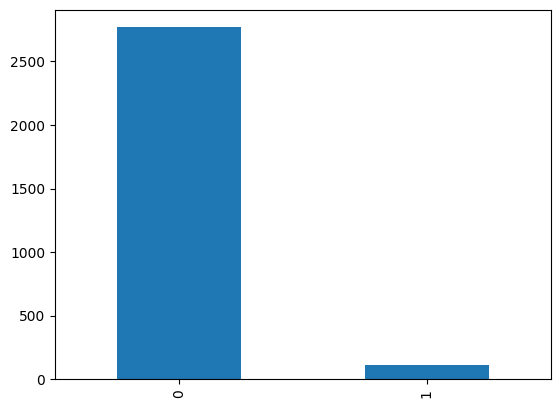

In [ ]:
Stroke['stroke'].value_counts().plot.bar()

array([<Axes: ylabel='stroke'>], dtype=object)

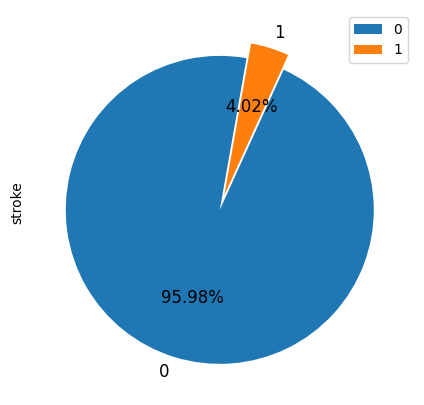

In [ ]:
Stroke.stroke.value_counts().plot(kind='pie', subplots=True, autopct='%1.2f%%'
,explode = (0.05, 0.05), startangle=80, legend=True,fontsize=12, figsize=(8,5), textprops={'color':'black'})


<ipython-input-652-46a1f876c0bd>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  crr=Stroke.corr()


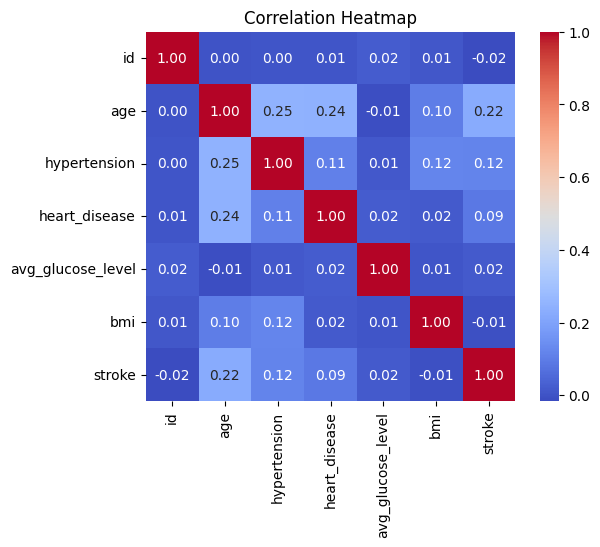

In [ ]:
crr=Stroke.corr()
sns.heatmap(crr,annot=True,cmap="coolwarm",fmt='.2f',square=True)
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
Stroke=Stroke.drop(columns=['id','Residence_type'])
Stroke.rename(columns={'stroke':'Target'}, inplace=True)



In [ ]:
Stroke=pd.get_dummies(Stroke,columns=['gender','work_type'])
Stroke['smoking_status']=Stroke['smoking_status'].replace({'never smoked':0,'formerly smoked':1,'smokes':2})
Stroke['ever_married']=Stroke['ever_married'].replace({'Yes':1,'No':0})

In [ ]:
scaler=MinMaxScaler()

scaler.fit(Stroke)

Stroke_scaled=pd.DataFrame(scaler.transform(Stroke),columns=Stroke.columns)

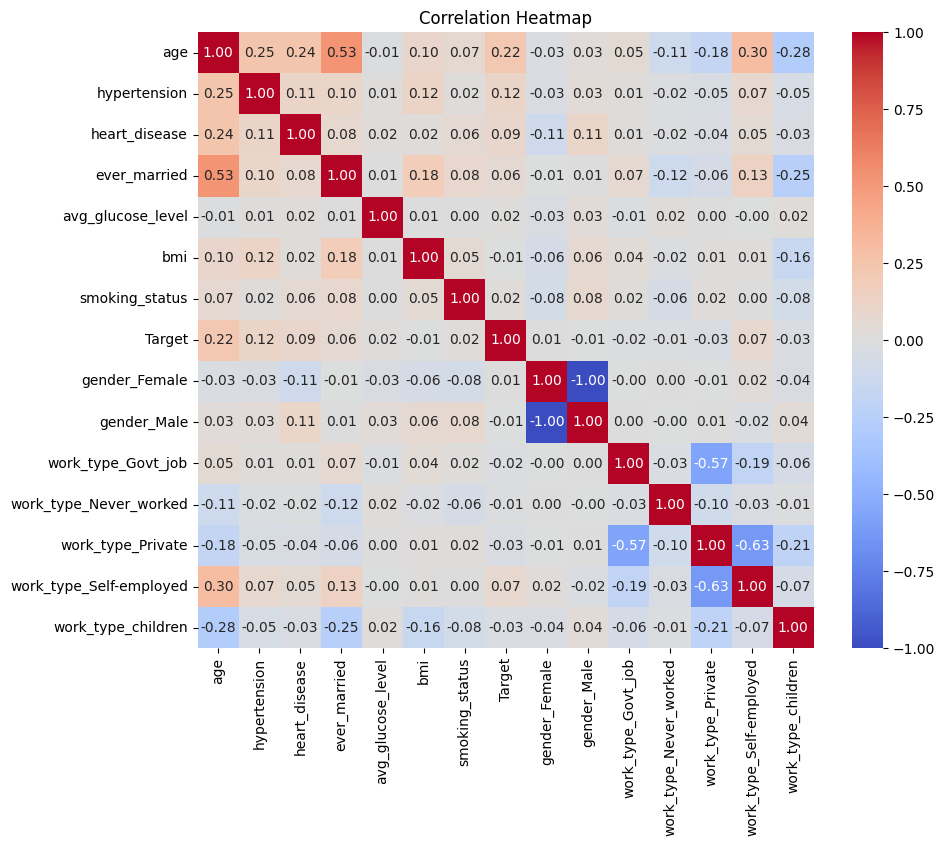

In [ ]:
crr=Stroke_scaled.corr()
plt.figure(figsize=(10,8))
sns.heatmap(crr,annot=True,cmap="coolwarm",fmt='.2f',square=True)
plt.title("Correlation Heatmap")
plt.show()

In [ ]:

Stroke_scaled.head()
Stroke_scaled.describe()

,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,smoking_status,Target,gender_Female,gender_Male,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children
count,2882.000000,2882.000000,2882.000000,2882.000000,2882.000000,2882.000000,2882.000000,2882.000000,2882.000000,2882.000000,2882.000000,2882.000000,2882.000000,2882.000000,2882.000000
mean,0.511687,0.094032,0.046495,0.737682,0.307296,0.479927,0.337092,0.040250,0.616933,0.383067,0.147814,0.004858,0.650590,0.174532,0.022207
std,0.260402,0.291924,0.210592,0.439971,0.196583,0.191167,0.406373,0.196579,0.486219,0.486219,0.354977,0.069540,0.476866,0.379632,0.147381
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.305556,0.000000,0.000000,0.000000,0.165236,0.340764,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.513889,0.000000,0.000000,1.000000,0.276922,0.458599,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,0.708333,0.000000,0.000000,1.000000,0.409437,0.595541,0.500000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Dataset splitting and training model

In [ ]:
x=Stroke.drop('Target',axis=1)
y=Stroke['Target']



In [ ]:
class_weights=compute_class_weight("balanced",classes=[0,1],y=yTrain)
class_weight_dict={i:class_weights[i] for i in range(len(class_weights))}
rf=RandomForestClassifier(n_estimators=100,random_state=42,class_weight=class_weight_dict,max_depth= None, max_features= 'sqrt', max_samples= 0.9, min_samples_leaf= 1, min_samples_split= 2, ccp_alpha= 0.0, warm_start= True,criterion='entropy')





In [ ]:
k_folds=5
kf=StratifiedKFold(n_splits=k_folds,shuffle=True,random_state=42)

In [ ]:
for train_index,test_index in kf.split(x,y):
  X_train,X_test=x.iloc[train_index],x.iloc[test_index]
  Y_train,Y_test=y.iloc[train_index],y.iloc[test_index]

  smote=RandomOverSampler(random_state=42)
  X_train_resampled,Y_train_resampled=smote.fit_resample(X_train,Y_train)

  rf.fit(X_train_resampled,Y_train_resampled)

  y_pred=rf.predict(X_test)
  accuracy=accuracy_score(Y_test,y_pred)

  yPred=rf.predict(X_train_resampled)
  accuracy1=accuracy_score(Y_train_resampled,yPred)
  print("--------------------------------------------------------------------")
  print("--------Shape of the Traing Data {}---------------------------------". format(X_train_resampled.shape))

  print("-------Unseen Data:-----------")
  print("Accuracy: {}\n".format(accuracy))
  print("Classification Report:\n{}\n".format(classification_report(Y_test,y_pred)))
  print("Confusion Matrices: \n{}\n\n".format(confusion_matrix(Y_test,y_pred)))

  print("-------Seen Data:--------------")
  print("Accuracy: {}\n".format(accuracy1))
  print("Classification Report:\n{}\n".format(classification_report(Y_train_resampled,yPred)))
  print("Confusion Matrices:\n {}".format(confusion_matrix(Y_train_resampled,yPred)))



  print("_____________Feature Importance______________")
  importance=rf.feature_importances_
  indices= np.argsort(importance)[::-1]
  print("Feature ranking::")
  for f in range(X_train_resampled.shape[1]):
    print(f"{f+1}. Feature {indices[f]}:{importance[indices[f]]}")


  print("--------------------------------------------------------------------\n\n\n")



--------------------------------------------------------------------
--------Shape of the Traing Data (4426, 14)---------------------------------
-------Unseen Data:-----------
Accuracy: 0.9480069324090121

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       553
           1       0.00      0.00      0.00        24

    accuracy                           0.95       577
   macro avg       0.48      0.49      0.49       577
weighted avg       0.92      0.95      0.93       577


Confusion Matrices: 
[[547   6]
 [ 24   0]]


-------Seen Data:--------------
Accuracy: 1.0

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2213
           1       1.00      1.00      1.00      2213

    accuracy                           1.00      4426
   macro avg       1.00      1.00      1.00      4426
weighted avg       1.00      1.00      1.00      4426


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:452: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:452: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn(


--------------------------------------------------------------------
--------Shape of the Traing Data (4426, 14)---------------------------------
-------Unseen Data:-----------
Accuracy: 1.0

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       553
           1       1.00      1.00      1.00        23

    accuracy                           1.00       576
   macro avg       1.00      1.00      1.00       576
weighted avg       1.00      1.00      1.00       576


Confusion Matrices: 
[[553   0]
 [  0  23]]


-------Seen Data:--------------
Accuracy: 0.8755083596927248

Classification Report:
              precision    recall  f1-score   support

           0       0.80      1.00      0.89      2213
           1       1.00      0.75      0.86      2213

    accuracy                           0.88      4426
   macro avg       0.90      0.88      0.87      4426
weighted avg       0.90      0.88      0.87      4426


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:452: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:452: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn(


--------------------------------------------------------------------
--------Shape of the Traing Data (4426, 14)---------------------------------
-------Unseen Data:-----------
Accuracy: 1.0

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       553
           1       1.00      1.00      1.00        23

    accuracy                           1.00       576
   macro avg       1.00      1.00      1.00       576
weighted avg       1.00      1.00      1.00       576


Confusion Matrices: 
[[553   0]
 [  0  23]]


-------Seen Data:--------------
Accuracy: 0.8707636692272933

Classification Report:
              precision    recall  f1-score   support

           0       0.80      1.00      0.89      2213
           1       1.00      0.74      0.85      2213

    accuracy                           0.87      4426
   macro avg       0.90      0.87      0.87      4426
weighted avg       0.90      0.87      0.87      4426


In [ ]:
#K FOld validation
k=5
kf=KFold(n_splits=k,shuffle=True,random_state=42)
result=cross_val_score(rf,xTrainResampled,yTrainResampled,cv=kf,scoring='accuracy')
print("KFold results:: {}".format(result))
print("kFold Average:: {}".format(result.mean()))

KFold results:: [0.99036145 0.9939759  0.98554217 0.99034982 0.99155609]
kFold Average:: 0.9903570857616231


In [ ]:
# due low RAM all the parameters were checked in seprate groups
param_grid= {
    'n_estimators': [100, 200, 300],
    'criterion': ['gini', 'entropy'],

   }

search=GridSearchCV(estimator=rf,param_grid=param_grid, cv=5, scoring='accuracy')
search.fit(X_train_resampled,Y_train_resampled)

bestParams=search.best_params_
print("Best Hyperparameters: ", bestParams)

bestModel =search.best_estimator_
test_accuracy=bestModel.score(xTest,yTest)
print("test Accuracy",test_accuracy)

Best Hyperparameters:  {'criterion': 'entropy', 'n_estimators': 100}
test Accuracy 0.986130374479889
